There are many ways to make a game. Though using Jupyter notebooks and [widgets](https://ipywidgets.readthedocs.io/en/stable/) isn't the way most people make games, it's definitely a way to create simple games and prototypes. By using [Binder](https://gke.mybinder.org/) you can also allow your games to be played in a browser, making it simple to share them.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/quantumjim/jupyter-engine/master?filepath=Example.ipynb)

I've made a simple function that can be used as a basis for games. So if you don't want to figure out widgets for yourself, you can just use this.


In [1]:
from engine import run_game

To use it you need to create a class that defines your game. We'll create a simple example, for a game which will display images. Those images will be displayed using matplotlib, so we first need to import it.

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Now for the game object.

The game engine supports turn based play. In each turn, the player chooses first chooses an option for an input named `a`, and then chooses an option for `b` and one for `c`. The image and the possible options for each input can be altered based on the inputs given.

The game object must have methods `given_a`, `given_b` and `given_c` in order to be compatible with the game engine.

In [3]:
class GameObject():
    '''
    Defines a 'game' for which each input is a choice of two numbers,
    with the choice being of input+1 and input+2 for the last input given.
    Once input c is given, one of two images is displayed depending on
    whether c is odd or even.
    
    Obviously it isn't really a game, but it demontrates the principles.
    '''
    def __init__ (self):
        # set up the figure and display the initial image
        self.fig = plt.figure()
        self.ax = self.fig.gca()
        self.fig.show()
        plt.axis('off')
        image = mpimg.imread("test1.png")
        plt.imshow(image, interpolation='None')
        self.fig.canvas.draw()
        
        # define initial values and choices for the three inputs
        self.a = ''
        self.b = ''
        self.c = ''
        self.options_a = ['a','1','2'] # options are initially only given for a
        self.options_b = ['']
        self.options_c = ['']
        
    def given_a(self,a):
        '''
        Stores input a and sets up options for input b.
        '''
        self.a = a
        self.options_b = ['b',str(int(self.a)+1),str(int(self.a)+2)]
    
    def given_b(self,b):
        '''
        Stores input b and sets up options for input c.
        '''
        self.b = b
        self.options_c = ['c',str(int(self.b)+1),str(int(self.b)+2)]
        
    def given_c(self,c):
        '''
        Stores input c and sets up a new round, with options for a and none for b and c.
        
        Also displays an image that depends on the output for c.
        '''
        self.c = c
        
        self.options_a = ['a',str(int(self.c)+1),str(int(self.c)+2)]
        self.options_b = ['']
        self.options_c = ['']
        
        image = mpimg.imread("test"+str(int(c)%2)+".png")
        plt.imshow(image, interpolation='None')
        self.fig.canvas.draw()


Now let's try it out.

<IPython.core.display.Javascript object>


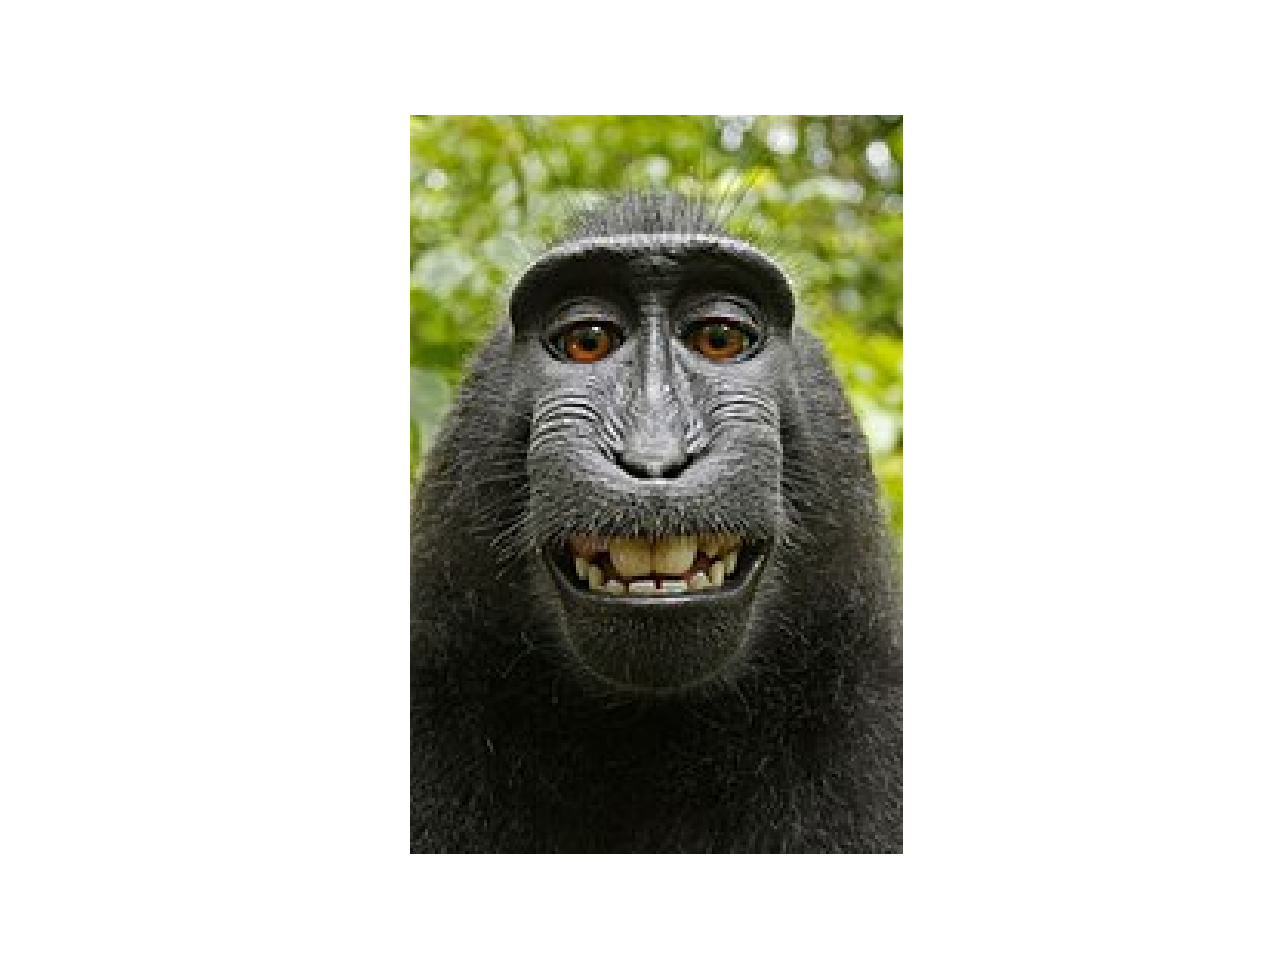

In [5]:
game = GameObject()
run_game(game)